# DBSCAN Implementation

In [1]:
# DBSCAN IMPLEMENTATION
import numpy as np
import pandas as pd
from scipy import spatial
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

Variation Ratio:  [0.64398984 0.06077551]


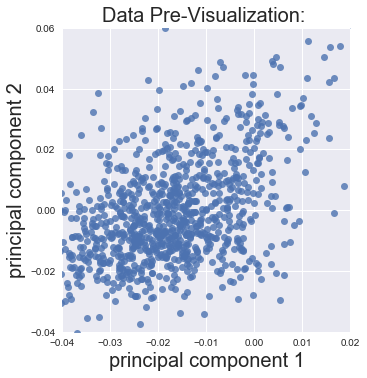

In [3]:
class MY_DBSCAN:

    def __init__(self, filepath, ndims):
        column_names = list(range(ndims))
        # DataFrame containing features with index name 'Index'
        self.__df_original = pd.read_csv(filepath, names = ['Index'] + column_names, header=None)
        self.__df = self.__df_original.drop(['Index'], axis = 1)
        
        # Normalize Data
        self.__df = pd.DataFrame(preprocessing.normalize(self.__df, norm='l2', axis=1, copy=False, return_norm=False))

        # No of dims in input
        self.__ndim = ndims

        #print(self.__df.head())

        # Find Principal Components for visualization
        self.__pca()

        # Random Samples
        self.__random_samples = np.random.choice(self.__df.shape[0], 1000, replace=False)

        # Visualization Parameter Set
        sns.set(rc={'figure.figsize':(6,4)})

    def __pca(self):
        # PCA for visualization
        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(self.__df)
        print('Variation Ratio: ', pca.explained_variance_ratio_)
        self.__principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

    def pre_visualize(self):
        df_sample = self.__principalDf.iloc[self.__random_samples,]
        lm = sns.lmplot(data=df_sample, x='principal component 1', y='principal component 2', 
                   fit_reg=False, legend=False, legend_out=True)
        plt.xlabel('principal component 1', fontsize = 20)
        plt.ylabel('principal component 2', fontsize = 20)
        plt.title('Data Pre-Visualization: ', fontsize = 20)
        plt.xlim((-0.04, 0.02))
        plt.ylim((-0.04, 0.06))
        
    def __regionQuery(self, P):
        # return document IDs that are within regionQuery
        dist = pd.DataFrame(spatial.distance.cdist(self.__df.iloc[P,0:].to_frame().T, self.__df.iloc[0:,0:], metric='euclidean')).T
        dist.columns = ['distance']
        return self.__df.loc[dist['distance'] < self.__eps].index.values
    
    def __growCluster(self, P):
        # Depth First Search carried out for core-point and border point
        self.__df_label['label'][P] = self.__C
        i = 0
        while(i < len(self.__NeighborPts)):
            # Neighbor Point of a doc id P
            Pn = self.__NeighborPts[i]

            if self.__df_label['label'][Pn] == -1:
                self.__df_label['label'][Pn] = C
            elif self.__df_label['label'][Pn] == 0:
                self.__df_label['label'][Pn] = C
                PnNeighborPts = self.__regionQuery(Pn)
                if len(PnNeighborPts) >= self.__minPts:
                    self.__NeighborPts = np.concatenate(([self.__NeighborPts], [PnNeighborPts]), axis = 1)[0]
        i += 1
    
    def run(self, eps, minPts):
        self.__eps = eps
        self.__minPts = minPts
        
        # Initialize labels with 0 ID: unmarked
        self.__df_label = pd.DataFrame(data = [0]*self.__df.shape[0], columns = ['label'])
        self.__C = 0

        # For every point: document id
        for P in range(0, self.__df.shape[0]):
            # Skip Marked points
            if not (self.__df_label['label'].values[P] == 0):
                continue

            # Get neighbors of the point
            self.__NeighborPts = self.__regionQuery(P)

            # Check minPts satisfiability
            if len(self.__NeighborPts) < self.__minPts:
                # Noise Point
                self.__df_label['label'][P] = -1
            else:
                # Belongs to a cluster
                self.__C += 1
                # DFS from that point again
                self.__growCluster(P)

    def label_write(self, filepath):
        # Write labels to file for post-processing
        self.__df.label['label'].to_csv(filepath)

# DBSCAN on original 300 dimension vector       
obj = MY_DBSCAN('docs_vector.csv', 300)
obj.pre_visualize()

# Actual DBSCAN Run for different parameters

[Note: Takes excessively long amount of time for 300-dimension data. Processing has been done using MCSR resources]

In [ ]:
eps = 0.03
minPts = 4
obj.run(eps, minPts)
label_filepath = './Labels_DBSCAN/Label_' + str(minPts) + '_' + str(eps) + '.csv'
obj.label_write(label_filepath)

In [ ]:
eps = 0.05
minPts = 4
obj.run(eps, minPts)
label_filepath = './Labels_DBSCAN/Label_' + str(minPts) + '_' + str(eps) + '.csv'
obj.label_write(label_filepath)